In [1]:
# install the metpy package for plotting skew-T
!pip install metpy
# install the siphon package for pulling data from the internet
!pip install siphon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.6 MB/s 


# Link for review and description of skew-T plots: https://www.youtube.com/watch?v=7p7c85hhgOo

## examples of different profiles.
https://www.weather.gov/source/zhu/ZHU_Training_Page/convective_parameters/skewt/skewtinfo.html#SKEW

In [13]:
# packages for plotting and data

from datetime import datetime
from siphon.simplewebservice.igra2 import IGRAUpperAir
from siphon.simplewebservice.wyoming import WyomingUpperAir 
import matplotlib.pyplot as plt

import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.plots import add_metpy_logo, SkewT
from metpy.units import units

# Data grab from archive

In [40]:

date = datetime(2021, 7, 29, 12)
station = 'USM00072797' # station list at https://www.ncei.noaa.gov/pub/data/igra/igra2-station-list.txt
data, header = IGRAUpperAir.request_data(date, station)


In [60]:
data.head()

,pressure,height,temperature,dewpoint,direction,speed,u_wind,v_wind,station,station_number,time,latitude,longitude,elevation,pw
0,997.0,214,19.4,17.9,290.0,1.0,0.939693,-0.342020,GRB,72645,2021-05-23 12:00:00,44.5,-88.11,214.0,39.61
1,989.0,283,18.8,17.0,295.0,4.0,3.625231,-1.690473,GRB,72645,2021-05-23 12:00:00,44.5,-88.11,214.0,39.61
2,968.0,466,20.6,18.0,309.0,13.0,10.102897,-8.181165,GRB,72645,2021-05-23 12:00:00,44.5,-88.11,214.0,39.61
3,953.0,599,20.8,17.3,319.0,20.0,13.121181,-15.094192,GRB,72645,2021-05-23 12:00:00,44.5,-88.11,214.0,39.61
4,951.8,610,20.7,17.2,320.0,20.0,12.855752,-15.320889,GRB,72645,2021-05-23 12:00:00,44.5,-88.11,214.0,39.61


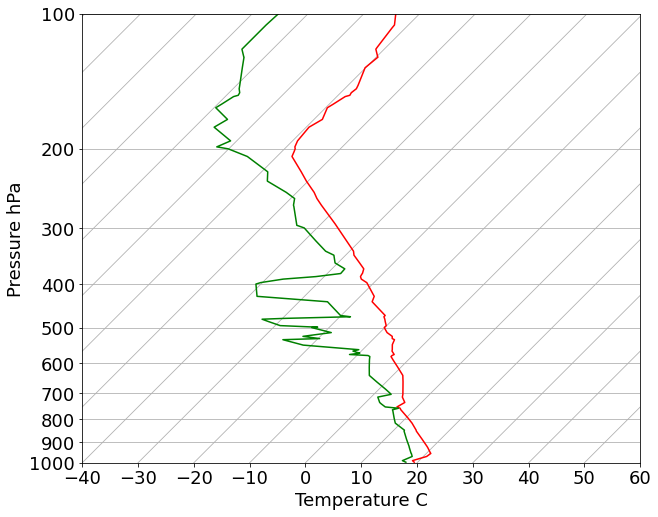

In [63]:


fig = plt.figure(figsize=(10, 10))                      # create a figure with a size of 10x10 inches
plt.rcParams['font.size'] = '18'                        # modify the font size

skew = SkewT(fig, rotation=45)                          # send the fig object to the SkewT class so we can make a SkewT plot

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot.
skew.plot(data['pressure'], data['temperature'], 'r')   # call the data to plot using the pandas format of data['name of the column']
skew.plot(data['pressure'], data['dewpoint'], 'g')
skew.ax.set_ylim(1000, 100)                             # set the y-axis limits
skew.ax.set_xlim(-40, 60)                               # set the x-axis limits
skew.ax.set_xlabel('Temperature C')                     # set the x-axis and y-axis labels
skew.ax.set_ylabel('Pressure hPa') 

plt.show()

## with dry and wet adiabatics

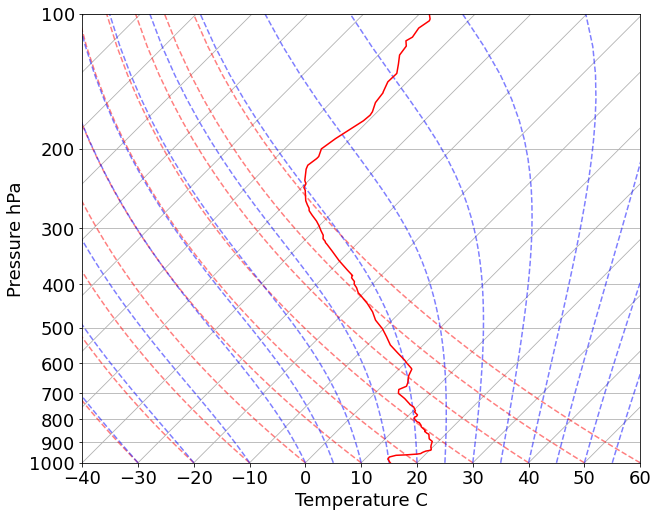

In [49]:
# with dry adiabatics

fig = plt.figure(figsize=(10, 10))
plt.rcParams['font.size'] = '18'

skew = SkewT(fig, rotation=45)

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot.
skew.plot(data['pressure'], data['temperature'], 'r')
# skew.plot(data['pressure'], data['dewpoint'], 'g')

skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-40, 60)
skew.ax.set_xlabel('Temperature C' )
skew.ax.set_ylabel('Pressure hPa')

skew.plot_dry_adiabats()
skew.plot_moist_adiabats()

plt.show()

In [58]:
date = datetime(2021, 5, 23, 12)
station = 'GRB' # stations at https://weather.uwyo.edu/upperair/sounding.html
data = WyomingUpperAir.request_data(site_id=station, time=date)

# different data grabs for different stations
# GRB 2021 05 01 00
# GRB 2021 05 23 00 and 12

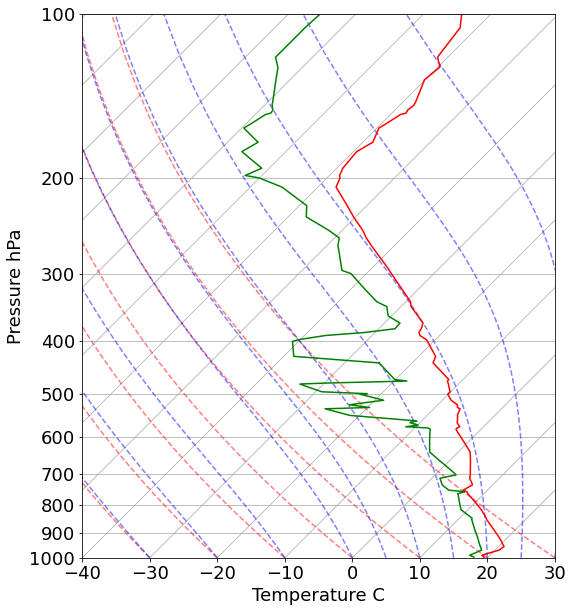

In [59]:
fig = plt.figure(figsize=(10, 10))
plt.rcParams['font.size'] = '18'

skew = SkewT(fig, rotation=45)

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot.
skew.plot(data['pressure'], data['temperature'], 'r')
skew.plot(data['pressure'], data['dewpoint'], 'g')
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-40, 30)
skew.ax.set_xlabel('Temperature C')
skew.ax.set_ylabel('Pressure hPa')
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()

plt.show()